In [25]:
import pandas as pd
data=pd.read_excel('C:\\Users\\sh921\\Desktop\\merge.xlsx')

data.head()

,Like,Comment,Date
0,3.7천,??본편 봤으면 치킨왕_광고_진짜최종.avi 6종 필수관람??\n날광고 받고 ??T...,9개월 전
1,1.6천,광고 존나 웃기네ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ 전지현 뭐 탑 연예인들...,9개월 전
2,1.9천,와 진짜 광고를 끝까지 보게 만들었네 예능식 광고..? 라해야되나 광고의 틀을 깬거...,9개월 전
3,3.2천,bbq는 광희 잡은게 신의 한수다... 광희는 안좋아 할 수가 없다ㅠ,9개월 전
4,3.8천,전지현언니랑 광희랑 고민하다가 진짜 광희 때문에 비비큐 먹었는데 어쩜 광희한테 저래...,9개월 전


In [26]:
import numpy as np
#데이터 프레임의 'text' 열의 값들을 str 형식으로 바꾸기
data.Comment = data.Comment.astype(str)


#text와 timestamp 열을 기준으로 중복된 데이터를 삭제, inplace : 데이터 프레임을 변경할지 선택(원본을 대체)
data.drop_duplicates(subset=['Comment','Date'], inplace=True)

#한글이 아니면 빈 문자열로 바꾸기
data['Comment'] = data['Comment'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣]',' ',regex=True)

#빈 문자열 NAN 값으로 바꾸기
dataf = data.replace({'': np.nan})
data = data.replace(r'^\s*$', None, regex=True)

#NAN 이 있는 행은 삭제
data.dropna(how='any', inplace=True)

#인덱스 차곡차곡
data = data.reset_index (drop = True)

#데이터 프레임에 null 값이 있는지 확인
print(data.isnull().values.any()) 

False


In [27]:
data.head()

,Like,Comment,Date
0,3.7천,본편 봤으면 치킨왕 광고 진짜최종 종 필수관람 날광고 받고 ...,9개월 전
1,1.6천,광고 존나 웃기네ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ 전지현 뭐 탑 연예인들...,9개월 전
2,1.9천,와 진짜 광고를 끝까지 보게 만들었네 예능식 광고 라해야되나 광고의 틀을 깬거...,9개월 전
3,3.2천,는 광희 잡은게 신의 한수다 광희는 안좋아 할 수가 없다ㅠ,9개월 전
4,3.8천,전지현언니랑 광희랑 고민하다가 진짜 광희 때문에 비비큐 먹었는데 어쩜 광희한테 저래...,9개월 전


In [28]:
from konlpy.tag import Okt
okt = Okt()

In [6]:
!pip install gensim

In [29]:
import pandas as pd
from pandas import DataFrame  as df
import numpy as np
from collections import Counter
from konlpy.tag import Okt
okt = Okt()
%matplotlib inline
import matplotlib.pyplot as plt
import re 
import gensim
from gensim import corpora, models
from gensim.models import CoherenceModel
from gensim.models.wrappers.ldamallet import LdaMallet

In [33]:
Data_list=data.Comment.values.tolist()
#(트윗 하나)씩 가져와서 명사만 추출한 후 리스트로 만들기
data_word=[]
for i in range(len(Data_list)):
    try:
        data_word.append(okt.nouns(Data_list[i]))
    except Exception as e:
        continue  

In [31]:
#토픽모델링에 필요한 Dictionary 와 Corpus 만들기 (no_below = 100 빈도수 100이하 단어 제거)
id2word=corpora.Dictionary(data_word)
id2word.filter_extremes(no_below = 100)
texts = data_word
corpus=[id2word.doc2bow(text) for text in texts]

In [37]:
mallet_path = 'C:\\Users\\sh921\\Desktop\\mallet-2.0.8\\mallet-2.0.8\\bin\\mallet' 
import os
os.environ['MALLET_HOME'] = 'C:\\Users\\sh921\\Desktop\\mallet-2.0.8\\mallet-2.0.8\\'
ldamallet = LdaMallet(mallet_path, corpus=corpus, num_topics=20, id2word=id2word)
print(ldamallet.show_topics(formatted=False))

[(10, [('사람', 0.15009746588693956), ('더', 0.11793372319688109), ('좀', 0.07043534762833008), ('한번', 0.04593892137751787), ('생각', 0.033983105912930474), ('때문', 0.032943469785575046), ('때', 0.02820012995451592), ('로', 0.024431448992852503), ('기분', 0.022417153996101363), ('못', 0.020662768031189084)]), (14, [('우리', 0.14948760330578512), ('말', 0.09672727272727273), ('년', 0.061223140495867766), ('지금', 0.05209917355371901), ('그', 0.04006611570247934), ('한국', 0.027239669421487603), ('땐', 0.026776859504132233), ('저', 0.024793388429752067), ('고블린', 0.020892561983471076), ('뒤', 0.02009917355371901)]), (0, [('것', 0.08506639180258291), ('하나', 0.06451221730431092), ('수', 0.05863093433577882), ('생각', 0.05481113199539198), ('그', 0.03698538774025344), ('집', 0.030679682289456132), ('위', 0.0282544109622264), ('더', 0.02534408536955072), ('세상', 0.02485903110410477), ('영상', 0.023707027223670647)]), (3, [('진짜', 0.2662277201383347), ('개', 0.12942271880819367), ('안', 0.052673583399840386), ('존나', 0.045357807927

In [38]:
#lda모델의 일관성 점수 계산
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=texts, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)


Coherence Score:  0.4231674572550411


In [48]:
#최적의 토픽 수를 찾기 위해 여러 토픽 수로 일관성을 계산하고 비교
def compute_coherence_values(dictionary, corpus, texts, limit, start=14, step=2):

    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=data_word, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [168]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=texts, start=1, limit=10, step=2)

C:\Users\sh921\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


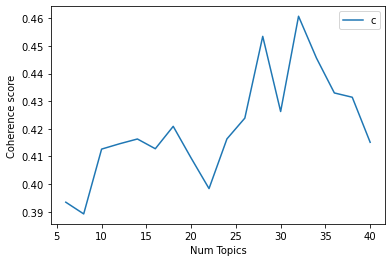

In [51]:
# 일관성 점수 그래프 보기
limit=41; start=6; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel
("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [61]:
# 토픽수 별 일관성 점수 확인
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 6  has Coherence Value of 0.3621
Num Topics = 8  has Coherence Value of 0.4179
Num Topics = 10  has Coherence Value of 0.4041
Num Topics = 12  has Coherence Value of 0.4164
Num Topics = 14  has Coherence Value of 0.4065
Num Topics = 16  has Coherence Value of 0.4188
Num Topics = 18  has Coherence Value of 0.4219
Num Topics = 20  has Coherence Value of 0.4186
Num Topics = 22  has Coherence Value of 0.4266
Num Topics = 24  has Coherence Value of 0.4209
Num Topics = 26  has Coherence Value of 0.447
Num Topics = 28  has Coherence Value of 0.4365
Num Topics = 30  has Coherence Value of 0.4187
Num Topics = 32  has Coherence Value of 0.4471
Num Topics = 34  has Coherence Value of 0.4376
Num Topics = 36  has Coherence Value of 0.4112
Num Topics = 38  has Coherence Value of 0.4212
Num Topics = 40  has Coherence Value of 0.424


In [163]:
# 토픽 수 선택하고 토픽들(단어) 확인
optimal_model = model_list[17]
model_topics = optimal_model.show_topics(formatted=False)
print(optimal_model.print_topics(num_words=40))

[(30, '0.169*"광고" + 0.079*"진짜" + 0.069*"다니엘" + 0.068*"손나은" + 0.068*"강" + 0.055*"제니" + 0.052*"레드" + 0.050*"폰" + 0.047*"매력" + 0.044*"조정석" + 0.037*"컨셉" + 0.032*"찰떡" + 0.026*"분위기" + 0.021*"홀" + 0.020*"갤럭시" + 0.018*"조합" + 0.017*"최고다" + 0.015*"천재" + 0.014*"아우라" + 0.014*"듯" + 0.014*"핸드폰" + 0.014*"킹" + 0.013*"전화" + 0.012*"광고주" + 0.007*"확" + 0.006*"안보" + 0.002*"홍보" + 0.002*"어쩜" + 0.001*"라면" + 0.001*"무엇" + 0.001*"자동차" + 0.001*"표정" + 0.001*"사용" + 0.001*"남자" + 0.001*"내" + 0.001*"배경" + 0.001*"디아블로" + 0.001*"구" + 0.001*"첨" + 0.001*"건"'), (12, '0.280*"광고" + 0.235*"처음" + 0.127*"끝" + 0.055*"봄" + 0.047*"건" + 0.044*"보고" + 0.040*"타" + 0.029*"시바견" + 0.026*"이후" + 0.025*"직접" + 0.020*"일부러" + 0.020*"클릭" + 0.019*"보기" + 0.016*"첨" + 0.010*"요" + 0.001*"감동" + 0.001*"친구" + 0.001*"이유" + 0.001*"유아인" + 0.001*"여" + 0.000*"웃음" + 0.000*"응" + 0.000*"의" + 0.000*"성공" + 0.000*"볼때" + 0.000*"검색" + 0.000*"반복" + 0.000*"개인" + 0.000*"엘지" + 0.000*"곡" + 0.000*"비" + 0.000*"설명" + 0.000*"회수" + 0.000*"남자" + 0.000*"정" + 0.000*"영혼" + 0.000

C:\Users\sh921\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [164]:
#트윗들의 토픽을 확인 (토픽별로)
def format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=texts):
    sent_topics_df = pd.DataFrame()

    #ldamodel[corpus]: lda_model에 corpus를 넣어 각 토픽 당 확률을 알 수 있음
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0: 
                wp = ldamodel.show_topic(topic_num,topn=40)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=Data_list)
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']


df_dominant_topic=df_dominant_topic.sort_values(by=['Dominant_Topic'])
df_dominant_topic

C:\Users\sh921\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
51231,51231,0.0,0.0250,"사람, 한번, 돈, 번, 정도, 스파이크, 귀신, 하루, 욕, 얼마나, 슈퍼셀, 만...",너무 귀엽
22531,22531,0.0,0.0250,"사람, 한번, 돈, 번, 정도, 스파이크, 귀신, 하루, 욕, 얼마나, 슈퍼셀, 만...",
22530,22530,0.0,0.0250,"사람, 한번, 돈, 번, 정도, 스파이크, 귀신, 하루, 욕, 얼마나, 슈퍼셀, 만...",
22529,22529,0.0,0.0250,"사람, 한번, 돈, 번, 정도, 스파이크, 귀신, 하루, 욕, 얼마나, 슈퍼셀, 만...",
50203,50203,0.0,0.0250,"사람, 한번, 돈, 번, 정도, 스파이크, 귀신, 하루, 욕, 얼마나, 슈퍼셀, 만...",
...,...,...,...,...,...
48368,48368,39.0,0.0433,"하나, 수, 위, 세상, 아이, 생각, 발달장애, 응원, 사회, 꿈, 것, 마음, ...",세상에 안살수없다ㅜㅜ 사랑합니다
90070,90070,39.0,0.0411,"하나, 수, 위, 세상, 아이, 생각, 발달장애, 응원, 사회, 꿈, 것, 마음, ...",걍 여자애집에가지
56393,56393,39.0,0.0580,"하나, 수, 위, 세상, 아이, 생각, 발달장애, 응원, 사회, 꿈, 것, 마음, ...",남편은 게임기 하나 살때도 아내에게 허락을 받아야되는 존재인가요 남성은 사소...
98505,98505,39.0,0.0461,"하나, 수, 위, 세상, 아이, 생각, 발달장애, 응원, 사회, 꿈, 것, 마음, ...",현대를 비난만 했는데 이것은 칭찬 합니다 더욱 많은 소외된 곳에 공익 사업 해 주...


In [165]:
# 각 토픽에서 가장 대표적인 문장 찾기
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)


sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)


topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()
topic_counts.sort_index(inplace=True)

topic_contribution = round(topic_counts/topic_counts.sum(), 4)
topic_contribution

lda_inform = pd.concat([sent_topics_sorteddf_mallet, topic_counts, topic_contribution], axis=1)
lda_inform.columns=["Topic_Num", "Topic_Perc_Contrib", "Keywords", "Text", "Num_Documents", "Perc_Documents"]


lda_inform

C:\Users\sh921\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Topic_Num,Topic_Perc_Contrib,Keywords,Text,Num_Documents,Perc_Documents
0.0,0.0,0.1352,"사람, 한번, 돈, 번, 정도, 스파이크, 귀신, 하루, 욕, 얼마나, 슈퍼셀, 만...",이국종 교수한테 외상치료 받는사람 해양경찰이 해상에서 구조하는 사람 대부분 생업에...,25382,0.2477
1.0,1.0,0.1229,"광고, 존나, 웃기, 와우, 수가, 버전, 약, 개, 시네마, 넼, 조회, 역대, ...",아앜ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅌㅋㅌㅋㅌㅌㅋㅋㅋㅋㅋㅌㅋㅋㅋㅋㅋㅋㅋㅌㅌㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ...,2756,0.0269
2.0,2.0,0.2033,"더, 좀, 제발, 음원, 사이다, 조금, 노라조, 디자인, 거, 곳, 라면, 쇼, ...",어쨋든 노라조는 광고업계 인지도에서 한층 더 광고의뢰 왔어요 의뢰 왔어요 ...,2541,0.0248
3.0,3.0,0.2319,"맛, 버거, 다시, 니, 롯데리아, 버거킹, 오징어, 달라, 선생님, 출시, 새우,...",아기 상어 새우버거 엄마 상어 새우버거 아빠 상어 새우버거 모두 맛이 좋습니다 ...,2698,0.0263
4.0,4.0,0.1403,"광고, 안, 여자, 스킵, 중, 남자, 제일, 어디, 요즘, 감, 홍보, 절대, 원...",스키드 어디감 웨섭은 타이칸 추파춥스 어디감 짱구는 어디감 이런거 하지말고 운...,1968,0.0192
5.0,5.0,0.2815,"정말, 진, 화이팅, 코로나, 의료, 모두, 여러분, 모든, 분, 위해, 가족, 대...",코로나 로 인해 누군가는 꼭 해야하지만 그 누구도 선뜻 나서기 힘든 일들을 대한민...,1458,0.0142
6.0,6.0,0.2392,"동원, 리, 삼성, 정동원, 화재, 장민호, 파트너, 민호, 건강, 축하, 최고, ...",정동원 건강파트너 삼성화재 정동원 민호삼촌 건강파트너 항상 응원합니다 ...,2502,0.0244
7.0,7.0,0.1182,"역시, 광고, 줄, 마지막, 아이폰, 알, 퀄, 듯, 장면, 무슨, 썸네일, 디아블...",중독성있는게 광고효과가 지리는게 누가 중독돼서 아이폰은역시 케이티 이러면 다른...,2409,0.0235
8.0,8.0,0.1536,"보고, 또, 광고, 광희, 계속, 치킨, 옴, 제대로, 비비큐, 땜, 아닠, 욬, ...",드디어 만 넘었다 생각날때 마다 들어와서 보고 새로고침하고 또보고 핸폰으...,2113,0.0206
9.0,9.0,0.1944,"이, 뭐, 광고, 몇번, 데, 병맛, 얼마, 뭘, 대체, 도대체, 거지, 사과, 급...",가사 사과 톡톡톡 트로피카나사과 톡톡톡 트로피카나사과 톡톡톡 트로피카나 헤이 트로...,2254,0.0220


In [166]:
lda_inform.to_csv ("C:\\Users\\sh921\\Desktop\\NLP19.csv", index = None)
lda_inform

C:\Users\sh921\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Topic_Num,Topic_Perc_Contrib,Keywords,Text,Num_Documents,Perc_Documents
0.0,0.0,0.1352,"사람, 한번, 돈, 번, 정도, 스파이크, 귀신, 하루, 욕, 얼마나, 슈퍼셀, 만...",이국종 교수한테 외상치료 받는사람 해양경찰이 해상에서 구조하는 사람 대부분 생업에...,25382,0.2477
1.0,1.0,0.1229,"광고, 존나, 웃기, 와우, 수가, 버전, 약, 개, 시네마, 넼, 조회, 역대, ...",아앜ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅌㅋㅌㅋㅌㅌㅋㅋㅋㅋㅋㅌㅋㅋㅋㅋㅋㅋㅋㅌㅌㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ...,2756,0.0269
2.0,2.0,0.2033,"더, 좀, 제발, 음원, 사이다, 조금, 노라조, 디자인, 거, 곳, 라면, 쇼, ...",어쨋든 노라조는 광고업계 인지도에서 한층 더 광고의뢰 왔어요 의뢰 왔어요 ...,2541,0.0248
3.0,3.0,0.2319,"맛, 버거, 다시, 니, 롯데리아, 버거킹, 오징어, 달라, 선생님, 출시, 새우,...",아기 상어 새우버거 엄마 상어 새우버거 아빠 상어 새우버거 모두 맛이 좋습니다 ...,2698,0.0263
4.0,4.0,0.1403,"광고, 안, 여자, 스킵, 중, 남자, 제일, 어디, 요즘, 감, 홍보, 절대, 원...",스키드 어디감 웨섭은 타이칸 추파춥스 어디감 짱구는 어디감 이런거 하지말고 운...,1968,0.0192
5.0,5.0,0.2815,"정말, 진, 화이팅, 코로나, 의료, 모두, 여러분, 모든, 분, 위해, 가족, 대...",코로나 로 인해 누군가는 꼭 해야하지만 그 누구도 선뜻 나서기 힘든 일들을 대한민...,1458,0.0142
6.0,6.0,0.2392,"동원, 리, 삼성, 정동원, 화재, 장민호, 파트너, 민호, 건강, 축하, 최고, ...",정동원 건강파트너 삼성화재 정동원 민호삼촌 건강파트너 항상 응원합니다 ...,2502,0.0244
7.0,7.0,0.1182,"역시, 광고, 줄, 마지막, 아이폰, 알, 퀄, 듯, 장면, 무슨, 썸네일, 디아블...",중독성있는게 광고효과가 지리는게 누가 중독돼서 아이폰은역시 케이티 이러면 다른...,2409,0.0235
8.0,8.0,0.1536,"보고, 또, 광고, 광희, 계속, 치킨, 옴, 제대로, 비비큐, 땜, 아닠, 욬, ...",드디어 만 넘었다 생각날때 마다 들어와서 보고 새로고침하고 또보고 핸폰으...,2113,0.0206
9.0,9.0,0.1944,"이, 뭐, 광고, 몇번, 데, 병맛, 얼마, 뭘, 대체, 도대체, 거지, 사과, 급...",가사 사과 톡톡톡 트로피카나사과 톡톡톡 트로피카나사과 톡톡톡 트로피카나 헤이 트로...,2254,0.0220
